In [2]:
# Comparing the number of times users flagged "phishing" between a computer (PC) and a smartphone (smartphone) using statistical analysis

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, shapiro

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Count "Phishing" Responses per Participant
df["Phishing_Count"] = df[question_cols].sum(axis=1)

# 🔹 Step 4: Compare Number of "Phishing" Responses by Device Type
device_col = "I'm answering the survey on a:"
pc_phishing = df[df[device_col] == "PC"]["Phishing_Count"].dropna()
phone_phishing = df[df[device_col] == "Smartphone"]["Phishing_Count"].dropna()

print(f"PC Phishing Responses: {pc_phishing.shape[0]}")
print(f"Smartphone Phishing Responses: {phone_phishing.shape[0]}\n")

print(f"PC count number of phishing: {pc_phishing.sum(axis=0)}")
print(f"Smartphone count number of phishing votes: {phone_phishing.sum(axis=0)}\n")

# print(pc_phishing)

# ===========================
# 🔹 Normality Test (Shapiro-Wilk)
# ===========================
pc_normality_p = shapiro(pc_phishing)[1]
phone_normality_p = shapiro(phone_phishing)[1]

print(f"Shapiro-Wilk Normality Test for PC: p-value = {pc_normality_p:.5f}")
print(f"Shapiro-Wilk Normality Test for Smartphone: p-value = {phone_normality_p:.5f}")

# ===========================
# 🔹 Statistical Test: t-Test or Mann-Whitney U
# ===========================
if pc_normality_p > 0.05 and phone_normality_p > 0.05:
    # If both groups are normally distributed, use independent t-test
    t_stat, p_value = ttest_ind(pc_phishing, phone_phishing, equal_var=False)
    test_used = "t-Test"
    effect_size = abs(np.mean(pc_phishing) - np.mean(phone_phishing)) / np.sqrt((np.var(pc_phishing) + np.var(phone_phishing)) / 2)
else:
    # Use Mann-Whitney U test if normality is violated
    u_stat, p_value = mannwhitneyu(pc_phishing, phone_phishing, alternative='two-sided')
    test_used = "Mann-Whitney U Test"
    effect_size = None  # No Cohen's d for non-parametric tests

# ===========================
# 🔹 Print Results
# ===========================
print(f"\n🔹 {test_used} for Device Type vs. Number of Phishing Responses:")
print(f"Statistic: {u_stat if test_used=='Mann-Whitney U Test' else t_stat}, p-value: {p_value:.5f}")

if effect_size:
    print(f"Effect Size (Cohen's d): {effect_size:.3f}")

if p_value < 0.05:
    print("✅ There is a **significant difference** in the number of phishing responses between PC and Smartphone users.")
else:
    print("❌ There is **no significant difference** in the number of phishing responses between PC and Smartphone users.")


PC Phishing Responses: 50
Smartphone Phishing Responses: 50

PC count number of phishing: 308
Smartphone count number of phishing votes: 239

Shapiro-Wilk Normality Test for PC: p-value = 0.01207
Shapiro-Wilk Normality Test for Smartphone: p-value = 0.00644

🔹 Mann-Whitney U Test for Device Type vs. Number of Phishing Responses:
Statistic: 1847.5, p-value: 0.00003
✅ There is a **significant difference** in the number of phishing responses between PC and Smartphone users.


In [3]:
# Statistical Analysis of the Effect of Device Type on Accuracy in Phishing Identification

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, chi2_contingency, fisher_exact, kruskal, shapiro


# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Calculate Accuracy
df["Accuracy"] = df[question_cols].apply(
    lambda row: np.mean([1 if row[q] == correct_answers[q] else 0 for q in question_cols]), axis=1
)

device_col = "I'm answering the survey on a:"
pc_scores = df[df[device_col] == "PC"]["Accuracy"].dropna()
phone_scores = df[df[device_col] == "Smartphone"]["Accuracy"].dropna()
print(f"pc_scores: {pc_scores.shape}")
print(f"phones: {phone_scores.shape}")
# ===========================
# 🔹 1️⃣ Does Device Type Affect Accuracy? (Normality Test, t-Test, Mann-Whitney U)
# ===========================

# Test for normality
pc_normality_p = shapiro(pc_scores)[1]
phone_normality_p = shapiro(phone_scores)[1]

print(f"shapiro(pc_scores) p_value: {shapiro(pc_scores)[1]}")
print(f"shapiro(phone_scores) p_value: {shapiro(phone_scores)[1]}")

if pc_normality_p > 0.05 and phone_normality_p > 0.05:
    # If both groups are normally distributed, use independent t-test
    t_stat, p_value_ttest = ttest_ind(pc_scores, phone_scores, equal_var=False)
    test_used = "t-Test"
    effect_size = abs(np.mean(pc_scores) - np.mean(phone_scores)) / np.sqrt((np.var(pc_scores) + np.var(phone_scores)) / 2)
else:
    # Use Mann-Whitney U test if normality is violated
    u_stat, p_value_ttest = mannwhitneyu(pc_scores, phone_scores, alternative='two-sided')
    test_used = "Mann-Whitney U Test"
    effect_size = None  # No Cohen's d for non-parametric tests

print(f"\n🔹 {test_used} for Device Type vs. Accuracy:")
print(f"Statistic: {u_stat if test_used=='Mann-Whitney U Test' else t_stat}, p-value: {p_value_ttest}")
if effect_size:
    print(f"Effect Size (Cohen's d): {effect_size:.3f}")




pc_scores: (50,)
phones: (50,)
shapiro(pc_scores) p_value: 0.006703544090581877
shapiro(phone_scores) p_value: 0.004002030997908092

🔹 Mann-Whitney U Test for Device Type vs. Accuracy:
Statistic: 1798.5, p-value: 0.00011738892867621169


In [18]:
# Same as before statistical Analysis of the Effect of Device Type on Accuracy in Phishing Identification

import scipy.stats as stats

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Calculate Accuracy
df["Accuracy"] = df[question_cols].apply(
    lambda row: np.mean([1 if row[q] == correct_answers[q] else 0 for q in question_cols]), axis=1
)

# Extract accuracy scores based on device type
pc_scores = df[df["I'm answering the survey on a:"] == "PC"]["Accuracy"].dropna()
phone_scores = df[df["I'm answering the survey on a:"] == "Smartphone"]["Accuracy"].dropna()

# ===========================
# 🔹 Shapiro-Wilk Normality Test (Checking if Data is Normally Distributed)
# ===========================
shapiro_pc = stats.shapiro(pc_scores)
shapiro_phone = stats.shapiro(phone_scores)

print(f"\n🔹 Shapiro-Wilk Test for Normality:")
print(f"PC Scores: W-statistic = {shapiro_pc.statistic:.5f}, p-value = {shapiro_pc.pvalue:.5f}")
print(f"Smartphone Scores: W-statistic = {shapiro_phone.statistic:.5f}, p-value = {shapiro_phone.pvalue:.5f}")

# Interpretation of Shapiro-Wilk
if shapiro_pc.pvalue > 0.05 and shapiro_phone.pvalue > 0.05:
    print("✅ Both PC and Smartphone scores follow a normal distribution. Using t-test.")
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(pc_scores, phone_scores, equal_var=False)
    test_used = "t-Test"
    effect_size = abs(np.mean(pc_scores) - np.mean(phone_scores)) / np.sqrt((np.var(pc_scores) + np.var(phone_scores)) / 2)
else:
    print("❌ At least one group does NOT follow a normal distribution. Using Mann-Whitney U test.")
    # Perform Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(pc_scores, phone_scores, alternative='two-sided')
    test_used = "Mann-Whitney U Test"
    effect_size = None  # No Cohen's d for non-parametric tests

# ===========================
# 🔹 Print Final Results
# ===========================
print(f"\n🔹 {test_used} for Device Type vs. Accuracy:")
print(f"Statistic: {u_stat if test_used=='Mann-Whitney U Test' else t_stat:.5f}, p-value: {p_value:.5f}")

# Effect Size (Cohen's d for t-test only)
if effect_size:
    print(f"Effect Size (Cohen's d): {effect_size:.3f}")

# Interpretation of Final Results
if p_value < 0.05:
    print("✅ There is a **significant difference** in accuracy between PC and Smartphone users!")
    if test_used == "t-Test":
        print(f"PC Mean Accuracy: {np.mean(pc_scores):.3f}, Smartphone Mean Accuracy: {np.mean(phone_scores):.3f}")
    else:
        print(f"PC Median Accuracy: {np.median(pc_scores):.3f}, Smartphone Median Accuracy: {np.median(phone_scores):.3f}")
else:
    print("❌ There is **no significant difference** in accuracy between PC and Smartphone users.")



🔹 Shapiro-Wilk Test for Normality:
PC Scores: W-statistic = 0.93221, p-value = 0.00670
Smartphone Scores: W-statistic = 0.92627, p-value = 0.00400
❌ At least one group does NOT follow a normal distribution. Using Mann-Whitney U test.

🔹 Mann-Whitney U Test for Device Type vs. Accuracy:
Statistic: 1798.50000, p-value: 0.00012
✅ There is a **significant difference** in accuracy between PC and Smartphone users!
PC Median Accuracy: 0.600, Smartphone Median Accuracy: 0.500


In [29]:
# Analyzing the Impact of Device Type on Question Classification Accuracy Using Chi-Square Test

import pandas as pd
import scipy.stats as stats

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Create a DataFrame with Correctness Per Question
for question in question_cols:
    df[f"{question}_Correct"] = df[question] == correct_answers[question]  # True = Correct, False = Incorrect

# ===========================
# 🔹 2️⃣ Are Some Questions Classified Differently by Device? (Chi-Square Test)
# ===========================
device_col = "I'm answering the survey on a:"

# Iterate through each question
for question in question_cols:
    contingency_table = pd.crosstab(df[device_col], df[f"{question}_Correct"])

    print(f"\n🔹 {question}: Device vs. Classification Accuracy")
    print(contingency_table)

    # Apply Chi-Square Test
    chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"🔸 Chi-Square Test Results → Chi2 Statistic: {chi2_stat:.3f}, p-value: {chi2_p:.5f}")

    # Interpretation of Results
    if chi2_p < 0.05:
        print("✅ Significant difference! The classification of this question differs by device.")
    else:
        print("❌ No significant difference found between devices for this question.")



🔹 Question 1: Device vs. Classification Accuracy
Question 1_Correct              False  True 
I'm answering the survey on a:              
PC                                 29     21
Smartphone                         44      6
🔸 Chi-Square Test Results → Chi2 Statistic: 9.944, p-value: 0.00161
✅ Significant difference! The classification of this question differs by device.

🔹 Question 2: Device vs. Classification Accuracy
Question 2_Correct              False  True 
I'm answering the survey on a:              
PC                                  0     50
Smartphone                          2     48
🔸 Chi-Square Test Results → Chi2 Statistic: 0.510, p-value: 0.47505
❌ No significant difference found between devices for this question.

🔹 Question 3: Device vs. Classification Accuracy
Question 3_Correct              False  True 
I'm answering the survey on a:              
PC                                 38     12
Smartphone                         38     12
🔸 Chi-Square Test Result

In [31]:
#Chi-Square Analysis of Question Accuracy Differences Between PC and Smartphone Users

import pandas as pd
import scipy.stats as stats

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Create a DataFrame with Correctness Per Question
for question in question_cols:
    df[f"{question}_Correct"] = df[question] == correct_answers[question]  # True = Correct, False = Incorrect

# ===========================
# 🔹 Chi-Square Test + True Counts for PC and Smartphone
# ===========================
device_col = "I'm answering the survey on a:"
results = []

# Iterate through each question
for question in question_cols:
    contingency_table = pd.crosstab(df[device_col], df[f"{question}_Correct"])

    # Extract only the "True" counts for PC and Smartphone
    pc_correct = contingency_table.loc["PC", True] if "PC" in contingency_table.index and True in contingency_table.columns else 0
    smartphone_correct = contingency_table.loc["Smartphone", True] if "Smartphone" in contingency_table.index and True in contingency_table.columns else 0

    # Apply Chi-Square Test
    chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)

    # Interpretation of Results
    significance = "✅ Significant" if chi2_p < 0.05 else "❌ Not Significant"

    # Append to results list
    results.append([question, pc_correct, smartphone_correct, chi2_stat, chi2_p, significance])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Question", "PC True Count", "Smartphone True Count", "Chi2 Statistic", "p-value", "Significance"])

# Display the results table
print("\n🔹 Chi-Square Test Results with True Counts:")
print(results_df.to_string(index=False))



🔹 Chi-Square Test Results with True Counts:
   Question  PC True Count  Smartphone True Count  Chi2 Statistic      p-value      Significance
 Question 1             21                      6        9.944191 1.613578e-03     ✅ Significant
 Question 2             50                     48        0.510204 4.750505e-01 ❌ Not Significant
 Question 3             12                     12        0.000000 1.000000e+00 ❌ Not Significant
 Question 4             31                     35        0.401070 5.265374e-01 ❌ Not Significant
 Question 5             46                     29       13.653333 2.198507e-04     ✅ Significant
 Question 6             16                     18        0.044563 8.328091e-01 ❌ Not Significant
 Question 7             35                      6       32.410087 1.248368e-08     ✅ Significant
 Question 8             50                     49        0.000000 1.000000e+00 ❌ Not Significant
 Question 9             26                     20        1.006441 3.157569e-01 ❌ N

In [20]:
# count incorrect responses per Question
import pandas as pd
import scipy.stats as stats

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Count Incorrect Answers for Each Question
incorrect_counts = {}
for question in question_cols:
    incorrect_counts[question] = (df[question] != correct_answers[question]).sum()

# Sort questions from hardest (most incorrect) to easiest
sorted_questions = sorted(incorrect_counts.items(), key=lambda x: x[1], reverse=True)

# Print ranking of questions based on incorrect answers
print("\n🔹 Ranking of Questions by Incorrect Answers (Hardest to Easiest):")
for rank, (question, incorrect_count) in enumerate(sorted_questions, 1):
    print(f"{rank}. {question} - {incorrect_count} incorrect responses")

# 🔹 Step 5: Kruskal-Wallis Test (Are Some Questions Significantly Harder?)
question_scores = [df[q].dropna() for q in question_cols]  # Collect non-null responses for each question
h_stat, kw_p_value = stats.kruskal(*question_scores)

print(f"\n🔹 Kruskal-Wallis Test for Question Difficulty:")
print(f"H-statistic: {h_stat:.3f}, p-value: {kw_p_value:.5f}")

# Interpretation of Kruskal-Wallis Test
if kw_p_value < 0.05:
    print("✅ Some questions are **significantly harder** than others!")
else:
    print("❌ No significant difference in difficulty between questions.")



🔹 Ranking of Questions by Incorrect Answers (Hardest to Easiest):
1. Question 3 - 76 incorrect responses
2. Question 1 - 73 incorrect responses
3. Question 10 - 69 incorrect responses
4. Question 6 - 66 incorrect responses
5. Question 7 - 59 incorrect responses
6. Question 9 - 54 incorrect responses
7. Question 4 - 34 incorrect responses
8. Question 5 - 25 incorrect responses
9. Question 2 - 2 incorrect responses
10. Question 8 - 1 incorrect responses

🔹 Kruskal-Wallis Test for Question Difficulty:
H-statistic: 293.667, p-value: 0.00000
✅ Some questions are **significantly harder** than others!


In [32]:
# count values per device
import pandas as pd

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Define Response Categories
response_categories = ["Phishing", "Legitimate", "Don't know"]
device_col = "I'm answering the survey on a:"

# 🔹 Step 3: Count Each Response Type by Device
response_counts = {}

for response in response_categories:
    response_counts[response] = df.groupby(device_col).apply(lambda x: (x.iloc[:, 1:].eq(response)).sum().sum())

# Convert to DataFrame
response_summary = pd.DataFrame(response_counts).T
response_summary.columns = ["PC", "Smartphone"]

# 🔹 Step 4: Display Results
print("\n🔹 Response Summary by Device:")
print(response_summary)



🔹 Response Summary by Device:
             PC  Smartphone
Phishing    308         239
Legitimate  151         198
Don't know   41          63


C:\Users\yovel\AppData\Local\Temp\ipykernel_8536\3804183472.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  response_counts[response] = df.groupby(device_col).apply(lambda x: (x.iloc[:, 1:].eq(response)).sum().sum())
C:\Users\yovel\AppData\Local\Temp\ipykernel_8536\3804183472.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  response_counts[response] = df.groupby(device_col).apply(lambda x: (x.iloc[

#POST HOC


🔹 PC: ANOVA / Kruskal-Wallis Test by Education Level
Shapiro-Wilk p-values for normality: [np.float64(0.026156112989051995), np.float64(0.08010338282880587), 1.0]
🔸 Kruskal-Wallis Results → H-statistic: 3.114, p-value: 0.21072
❌ No significant difference in phishing classifications by education level for PC users. (Kruskal-Wallis)

🔹 Smartphone: ANOVA / Kruskal-Wallis Test by Education Level
Shapiro-Wilk p-values for normality: [np.float64(0.06248233799671915), np.float64(0.3324441075427048), np.float64(0.0012407259151036277), 1.0]
🔸 Kruskal-Wallis Results → H-statistic: 7.016, p-value: 0.07138
❌ No significant difference in phishing classifications by education level for Smartphone users. (Kruskal-Wallis)


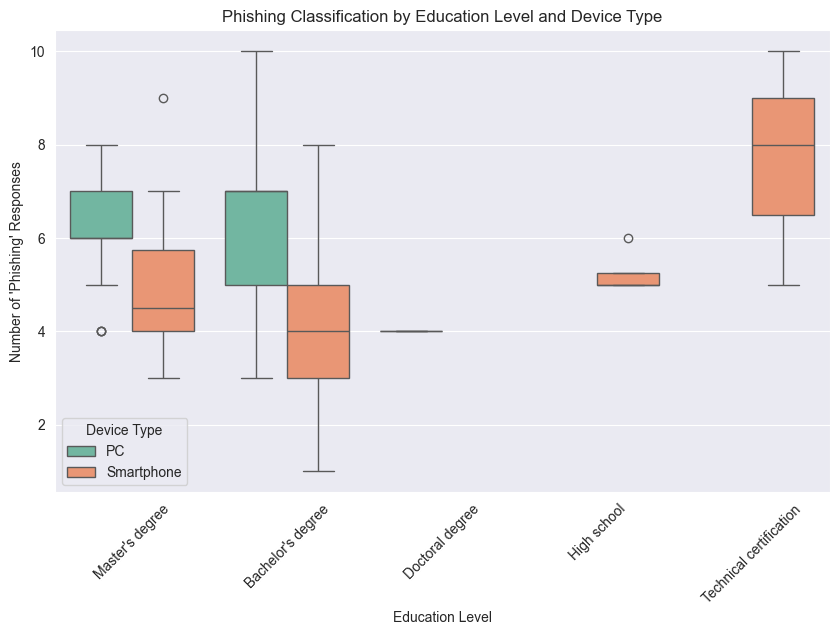

In [44]:
#Analyzing the Impact of Education Level on Phishing Classification Across Device Types Using Kruskal-Wallis Tests

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, f_oneway, shapiro

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Count "Phishing" Responses for Each Participant
df["Phishing_Count"] = df[question_cols].sum(axis=1)

# 🔹 Step 4: Split by Education Level & Device Type
education_col = "What is your level of education?"
device_col = "I'm answering the survey on a:"

# Create groups based on education and device
grouped_data = df.groupby([education_col, device_col])["Phishing_Count"].apply(list).reset_index()

# Convert to dictionary for testing
education_levels = df[education_col].unique()
device_types = df[device_col].unique()

# ANOVA / Kruskal-Wallis Test
for device in device_types:
    print(f"\n🔹 {device}: ANOVA / Kruskal-Wallis Test by Education Level")

    # Extract data for the device
    device_df = df[df[device_col] == device]

    # Group data by education level
    groups = [device_df[device_df[education_col] == edu]["Phishing_Count"].dropna() for edu in education_levels if edu in device_df[education_col].values]

    # Check Normality (Shapiro Test)
    normality_p_values = [shapiro(group)[1] if len(group) > 3 else 1.0 for group in groups]
    print(f"Shapiro-Wilk p-values for normality: {normality_p_values}")

    if all(p > 0.05 for p in normality_p_values):
        # If normal, perform ANOVA
        f_stat, p_anova = f_oneway(*groups)
        print(f"🔸 ANOVA Results → F-statistic: {f_stat:.3f}, p-value: {p_anova:.5f}")
        test_used = "ANOVA"
        p_value = p_anova
    else:
        # If not normal, perform Kruskal-Wallis Test
        h_stat, p_kruskal = kruskal(*groups)
        print(f"🔸 Kruskal-Wallis Results → H-statistic: {h_stat:.3f}, p-value: {p_kruskal:.5f}")
        test_used = "Kruskal-Wallis"
        p_value = p_kruskal

    # Interpretation
    if p_value < 0.05:
        print(f"✅ Significant difference in phishing classifications by education level for {device} users! ({test_used})")
    else:
        print(f"❌ No significant difference in phishing classifications by education level for {device} users. ({test_used})")

# 🔹 Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=education_col, y="Phishing_Count", hue=device_col, palette="Set2")
plt.title("Phishing Classification by Education Level and Device Type")
plt.xlabel("Education Level")
plt.ylabel("Number of 'Phishing' Responses")
plt.xticks(rotation=45)
plt.legend(title="Device Type")
plt.show()



🔹 Chi-Square Test Results for Each Question:
   Question  Chi2 Statistic      p-value      Significance
 Question 1        9.944191 1.613578e-03     ✅ Significant
 Question 2        0.510204 4.750505e-01 ❌ Not Significant
 Question 3        0.000000 1.000000e+00 ❌ Not Significant
 Question 4        0.401070 5.265374e-01 ❌ Not Significant
 Question 5       13.653333 2.198507e-04     ✅ Significant
 Question 6        0.044563 8.328091e-01 ❌ Not Significant
 Question 7       32.410087 1.248368e-08     ✅ Significant
 Question 8        0.000000 1.000000e+00 ❌ Not Significant
 Question 9        1.006441 3.157569e-01 ❌ Not Significant
Question 10        0.187003 6.654226e-01 ❌ Not Significant

🔹 t-Test for Gender vs. Number of Phishing Responses:
Statistic: 4.783028302345111, p-value: 0.00001
✅ Significant difference in phishing classifications between men and women!


C:\Users\yovel\AppData\Local\Temp\ipykernel_8536\1297847577.py:87: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  incorrect_answers = df[[f"{q}_Correct" for q in question_cols]].replace({True: 0, False: 1})


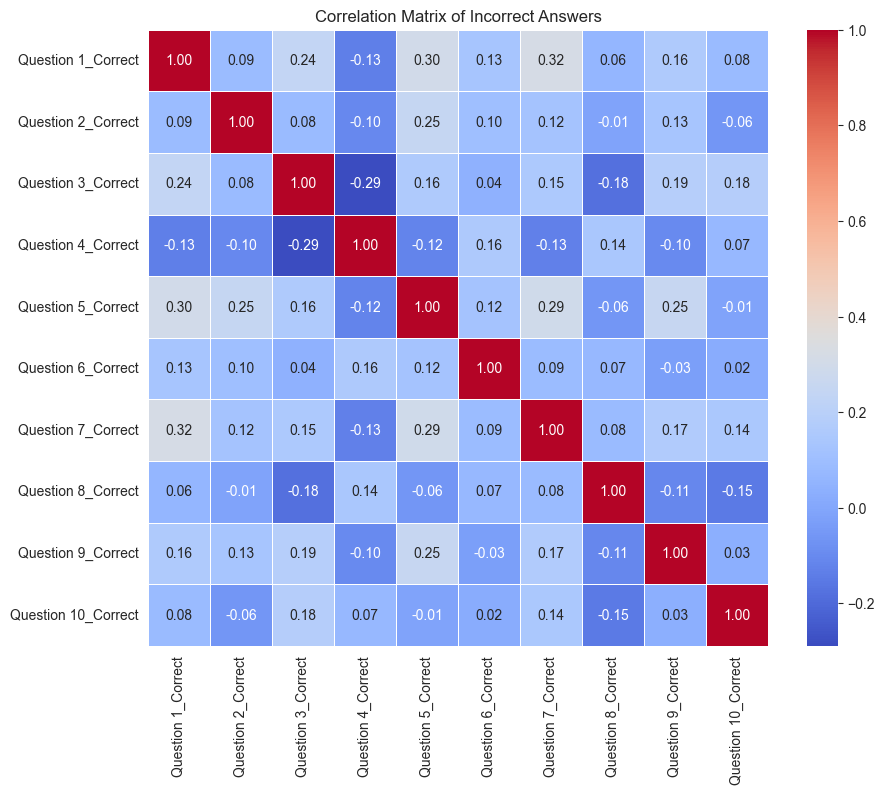

In [45]:
# Chi-Square Analysis of Question Accuracy Differences and Correlation of Incorrect Answers
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Create Correctness Columns
for question in question_cols:
    df[f"{question}_Correct"] = df[question] == correct_answers[question]

# ===========================
# 📌 2️⃣ Chi-Square for Each Question (Do Users Make More Mistakes on Certain Questions?)
# ===========================
device_col = "I'm answering the survey on a:"
chi_square_results = []

for question in question_cols:
    contingency_table = pd.crosstab(df[device_col], df[f"{question}_Correct"])

    # Chi-Square Test
    chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)

    # Interpretation
    significance = "✅ Significant" if chi2_p < 0.05 else "❌ Not Significant"
    chi_square_results.append([question, chi2_stat, chi2_p, significance])

# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results, columns=["Question", "Chi2 Statistic", "p-value", "Significance"])

# Display results
print("\n🔹 Chi-Square Test Results for Each Question:")
print(chi_square_df.to_string(index=False))

# ===========================




# ===========================
# 📌 6️⃣ Correlation Matrix of Incorrect Answers
# ===========================
incorrect_answers = df[[f"{q}_Correct" for q in question_cols]].replace({True: 0, False: 1})
correlation_matrix = incorrect_answers.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Incorrect Answers")
plt.show()


Shapiro-Wilk Normality Test for Male: p-value = 0.13872
Shapiro-Wilk Normality Test for Female: p-value = 0.05939

🔹 t-Test for Gender vs. Number of Phishing Responses:
Statistic: 4.783028302345111, p-value: 0.00001
✅ There is a **significant difference** in phishing classifications between men and women!


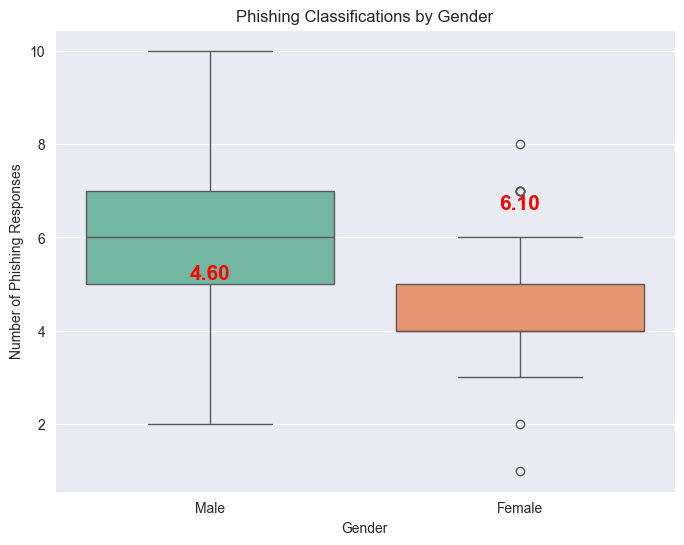

In [53]:
# Statistical Analysis of Phishing Classification Differences Between Genders

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Count "Phishing" Responses per Participant
df["Phishing_Count"] = df[question_cols].sum(axis=1)

# 🔹 Step 4: Extract Groups Based on Gender
gender_col = "What is your gender?"

# Make sure the gender column exists and has values
if gender_col not in df.columns:
    raise ValueError(f"Column '{gender_col}' is missing from the dataset.")

# Filter male and female participants
male_phishing = df[df[gender_col] == "Male"]["Phishing_Count"].dropna()
female_phishing = df[df[gender_col] == "Female"]["Phishing_Count"].dropna()

# Check if both groups have sufficient data
if len(male_phishing) < 3 or len(female_phishing) < 3:
    raise ValueError("Not enough data in one or both gender groups for statistical testing.")

# 🔹 Step 5: Normality Test (Shapiro-Wilk)
try:
    male_normality_p = shapiro(male_phishing)[1]
    female_normality_p = shapiro(female_phishing)[1]
except ValueError:
    print("⚠️ Shapiro-Wilk test failed (not enough variance in data). Assuming non-normal distribution.")
    male_normality_p, female_normality_p = 0, 0  # Force Mann-Whitney U test

print(f"Shapiro-Wilk Normality Test for Male: p-value = {male_normality_p:.5f}")
print(f"Shapiro-Wilk Normality Test for Female: p-value = {female_normality_p:.5f}")

# 🔹 Step 6: Choose and Perform Statistical Test
if male_normality_p > 0.05 and female_normality_p > 0.05:
    # Use t-Test if both groups are normally distributed
    try:
        t_stat, p_value = ttest_ind(male_phishing, female_phishing, equal_var=False)
        test_used = "t-Test"
    except ValueError:
        print("⚠️ t-Test failed due to low variance. Switching to Mann-Whitney U test.")
        test_used = "Mann-Whitney U Test"
        u_stat, p_value = mannwhitneyu(male_phishing, female_phishing, alternative='two-sided')
else:
    # Use Mann-Whitney U test if normality is violated
    u_stat, p_value = mannwhitneyu(male_phishing, female_phishing, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

# 🔹 Step 7: Print Final Results
print(f"\n🔹 {test_used} for Gender vs. Number of Phishing Responses:")
print(f"Statistic: {u_stat if test_used == 'Mann-Whitney U Test' else t_stat}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ There is a **significant difference** in phishing classifications between men and women!")
else:
    print("❌ No significant difference found between men and women.")

# 🔹 Step 8: Visualization - Distribution of Phishing Responses by Gender
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x=gender_col, y="Phishing_Count", hue=gender_col, palette="Set2", legend=False)

# חישוב ממוצע לכל קבוצה
means = df.groupby(gender_col)["Phishing_Count"].mean()

# הוספת ממוצע כטקסט על הגרף
for i, (group, mean_value) in enumerate(means.items()):
    ax.text(i, mean_value + 0.5, f"{mean_value:.2f}", horizontalalignment='center', fontsize=15, color="red", fontweight="bold")
plt.title("Phishing Classifications by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Phishing Responses")
plt.show()
